**[Taller 03] series de Taylor y polinomios de Lagrange**

Sebastián Pazmiño

Link del repositorio: https://github.com/Sebas-p2304/Metodos-Numericos 

Grafique las curvas de las series de Taylor para los siguientes casos:

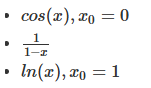

Polinomio de Taylor de orden 1: 1
Polinomio de Taylor de orden 2: 1 + (-1/2)*x^2
Polinomio de Taylor de orden 3: 1 + (-1/2)*x^2
Polinomio de Taylor de orden 4: 1 + (-1/2)*x^2 + (1/24)*x^4
Polinomio de Taylor de orden 5: 1 + (-1/2)*x^2 + (1/24)*x^4


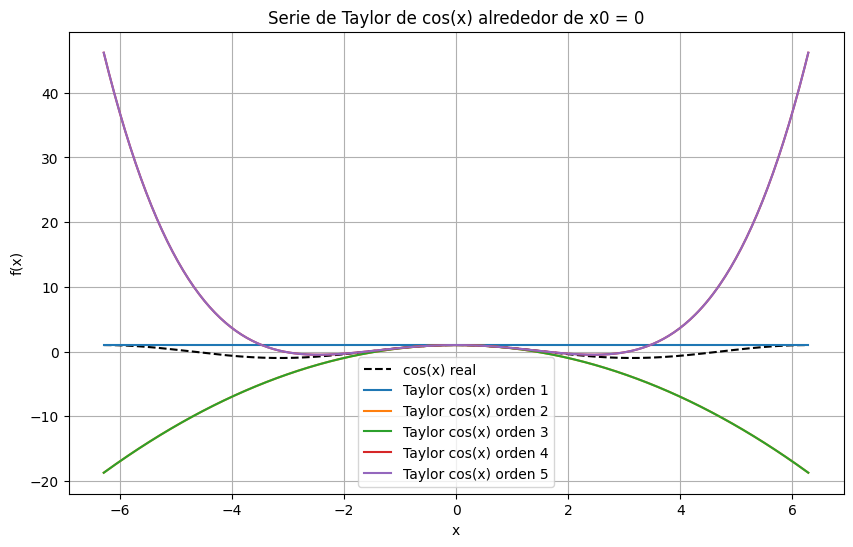

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from fractions import Fraction

def taylor_cos_term(x, n):
    """Calcula el término n de la serie de Taylor de cos(x) alrededor de 0."""
    return ((-1)**n * x**(2*n)) / math.factorial(2*n)

def taylor_cos_polynomial_fraction(order):
    """Calcula el polinomio de Taylor de cos(x) de orden 'order' alrededor de 0 y devuelve el polinomio como string con fracciones."""
    terms = []
    for i in range(order // 2 + 1):  # Solo necesitamos términos pares
        numerator = (-1)**i
        denominator = math.factorial(2*i)
        coefficient_fraction = Fraction(numerator, denominator)
        if i == 0:
            terms.append("1")
        elif coefficient_fraction == 1:
            terms.append(f"x^{2*i}")
        elif coefficient_fraction == -1:
            terms.append(f"-x^{2*i}")
        else:
            terms.append(f"({coefficient_fraction})*x^{2*i}")
    return " + ".join(terms).replace("+ -", "- ")

def taylor_cos_approximation(x, order):
    """Calcula la aproximación de la serie de Taylor de cos(x) de orden 'order' alrededor de 0."""
    cos_approx = 0
    for i in range(order // 2 + 1):
        cos_approx += taylor_cos_term(x, i)
    return cos_approx

# Dominio de la función para la gráfica
x = np.linspace(-2*np.pi, 2*np.pi, 400)

# Órdenes de los polinomios de Taylor que queremos graficar
orders_to_plot = [1, 2, 3, 4, 5]

plt.figure(figsize=(10, 6))
plt.plot(x, np.cos(x), label='cos(x) real', color='black', linestyle='--')

for order in orders_to_plot:
    plt.plot(x, taylor_cos_approximation(x, order), label=f'Taylor cos(x) orden {order}')
    polynomial_string = taylor_cos_polynomial_fraction(order)
    print(f"Polinomio de Taylor de orden {order}: {polynomial_string}")

# Añadir título y etiquetas a la gráfica
plt.title('Serie de Taylor de cos(x) alrededor de x0 = 0')
plt.xlabel('x')
plt.ylabel('f(x)')

# Añadir leyenda para identificar las curvas
plt.legend()

# Mostrar una cuadrícula para facilitar la lectura
plt.grid(True)

# Mostrar la gráfica
plt.show()

Polinomios de Taylor para f(x) = 1 / (1 - x):
Orden 1: T_1(x) = 1 + x
Orden 2: T_2(x) = 1 + x + x**2
Orden 3: T_3(x) = 1 + x + x**2 + x**3
Orden 5: T_5(x) = 1 + x + x**2 + x**3 + x**4 + x**5
Orden 10: T_10(x) = 1 + x + x**2 + x**3 + x**4 + x**5 + x**6 + x**7 + x**8 + x**9 + x**10


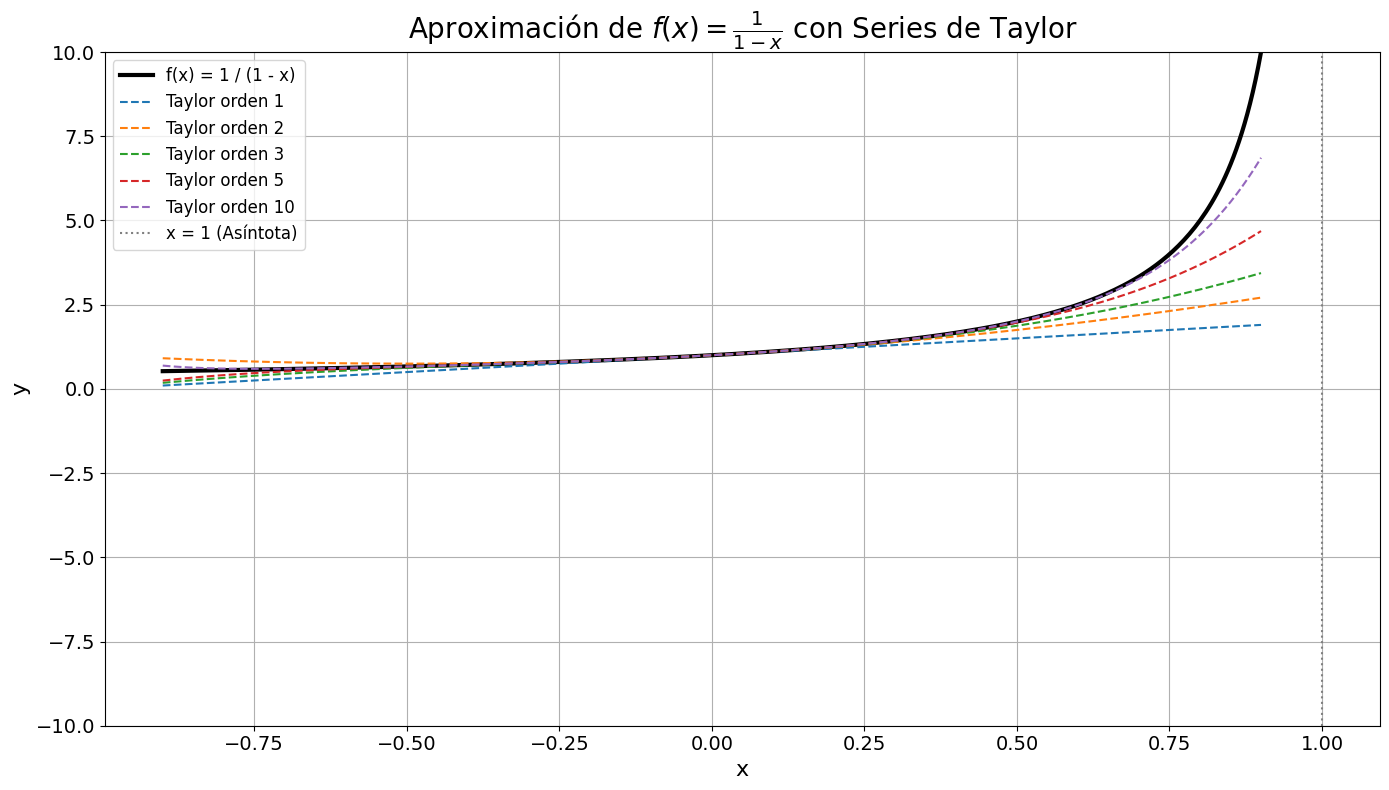

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función original
def f(x):
    return 1 / (1 - x)

# Función para generar el polinomio de Taylor como texto
def taylor_series_expr(n):
    terms = [f"x**{k}" if k > 1 else ("x" if k == 1 else "1") for k in range(n + 1)]
    return " + ".join(terms)

# Función para evaluar el polinomio de Taylor
def taylor_series(x, n):
    return sum([x**k for k in range(n + 1)])

# Rango de x (evitamos x = 1)
x = np.linspace(-0.9, 0.9, 400)

# Órdenes a graficar
ordenes = [1, 2, 3, 5, 10]

# Imprimir los polinomios
print("Polinomios de Taylor para f(x) = 1 / (1 - x):")
for n in ordenes:
    print(f"Orden {n}: T_{n}(x) = {taylor_series_expr(n)}")

# Crear figura más grande
plt.figure(figsize=(14, 8))  # Tamaño aumentado

# Graficar función original
plt.plot(x, f(x), label='f(x) = 1 / (1 - x)', color='black', linewidth=3)

# Graficar aproximaciones de Taylor
for n in ordenes:
    plt.plot(x, taylor_series(x, n), label=f'Taylor orden {n}', linestyle='--')

# Añadir detalles y aumentar tamaño de texto
plt.axvline(x=1, color='gray', linestyle=':', label='x = 1 (Asíntota)')
plt.title('Aproximación de $f(x) = \\frac{1}{1 - x}$ con Series de Taylor', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.ylim(-10, 10)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()  # Ajustar para evitar que se corte algo
plt.show()


Polinomios de Taylor para ln(x) alrededor de x0 = 1:
Orden 1: (x - 1)^1/1
Orden 2: (x - 1)^1/1 - (x - 1)^2/2
Orden 3: (x - 1)^1/1 - (x - 1)^2/2 + (x - 1)^3/3
Orden 5: (x - 1)^1/1 - (x - 1)^2/2 + (x - 1)^3/3 - (x - 1)^4/4 + (x - 1)^5/5


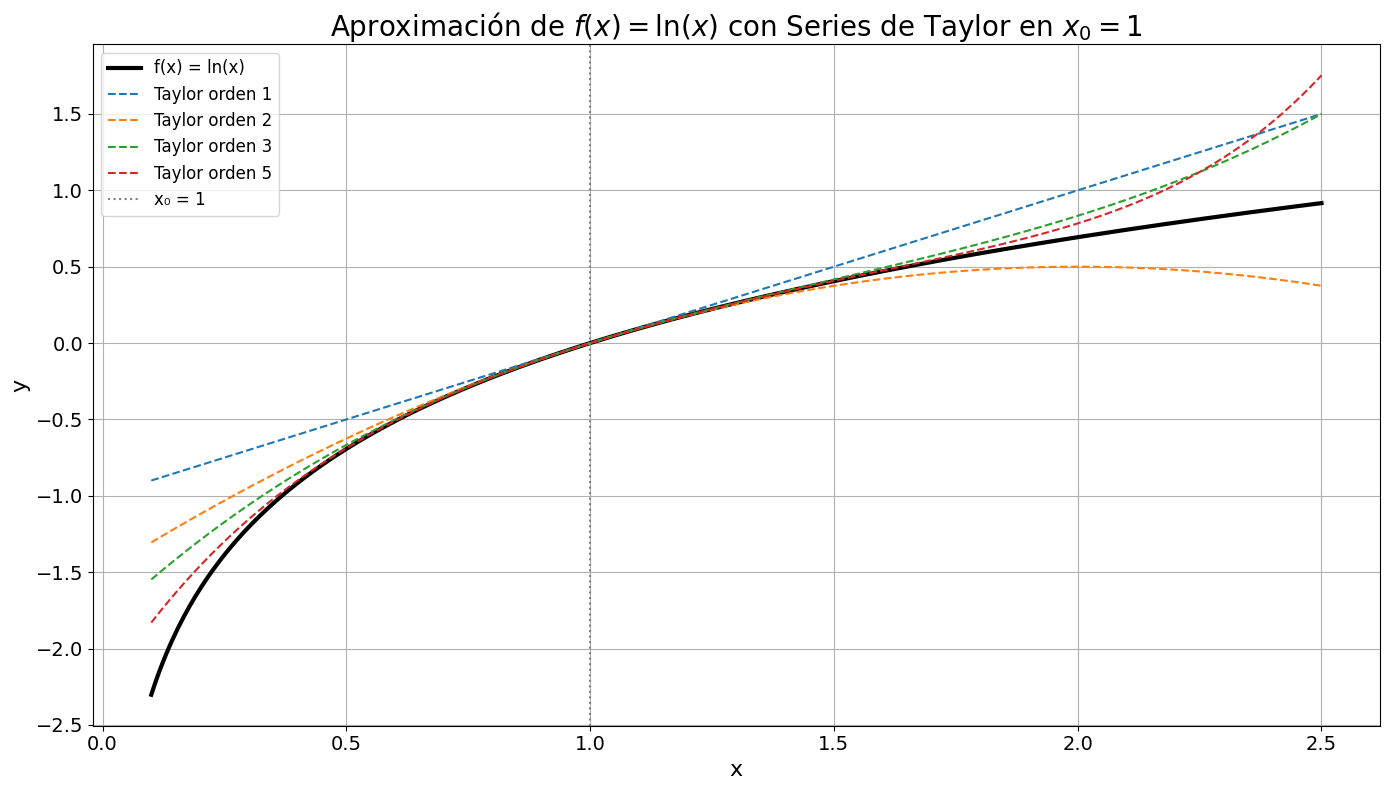

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return np.log(x)

# Serie de Taylor para ln(x) en x0 = 1 hasta orden n
def taylor_ln(x, n):
    result = np.zeros_like(x)
    for k in range(1, n + 1):
        term = ((-1)**(k + 1)) * ((x - 1)**k) / k
        result += term
    return result

# Rango de valores de x (evitar x <= 0 y x = 0)
x = np.linspace(0.1, 2.5, 400)

# Órdenes que queremos graficar
ordenes = [1, 2, 3, 5]

# Imprimir polinomios (como texto simbólico)
print("Polinomios de Taylor para ln(x) alrededor de x0 = 1:")
for n in ordenes:
    terms = [f"{' - ' if k % 2 == 0 else ' + '}(x - 1)^{k}/{k}" for k in range(1, n + 1)]
    formula = ''.join(terms).replace('+', '', 1).strip()
    print(f"Orden {n}: {formula}")

# Graficar
plt.figure(figsize=(14, 8))
plt.plot(x, f(x), label='f(x) = ln(x)', color='black', linewidth=3)

# Aproximaciones de Taylor
for n in ordenes:
    plt.plot(x, taylor_ln(x, n), label=f'Taylor orden {n}', linestyle='--')

plt.axvline(x=1, color='gray', linestyle=':', label='x₀ = 1')
plt.title('Aproximación de $f(x) = \\ln(x)$ con Series de Taylor en $x_0=1$', fontsize=20)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

Encuentre el polinomio de Lagrange para los siguientes datos y grafique:

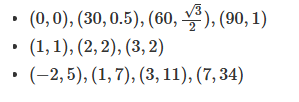

Polinomio de Lagrange - Conjunto A:
            3             2
-6.054e-07 x - 1.994e-05 x + 0.01781 x 

Polinomio de Lagrange - Conjunto B:
      2
-0.5 x + 2.5 x - 1 

Polinomio de Lagrange - Conjunto C:
         3         2
0.03981 x + 0.187 x + 0.7343 x + 6.039 



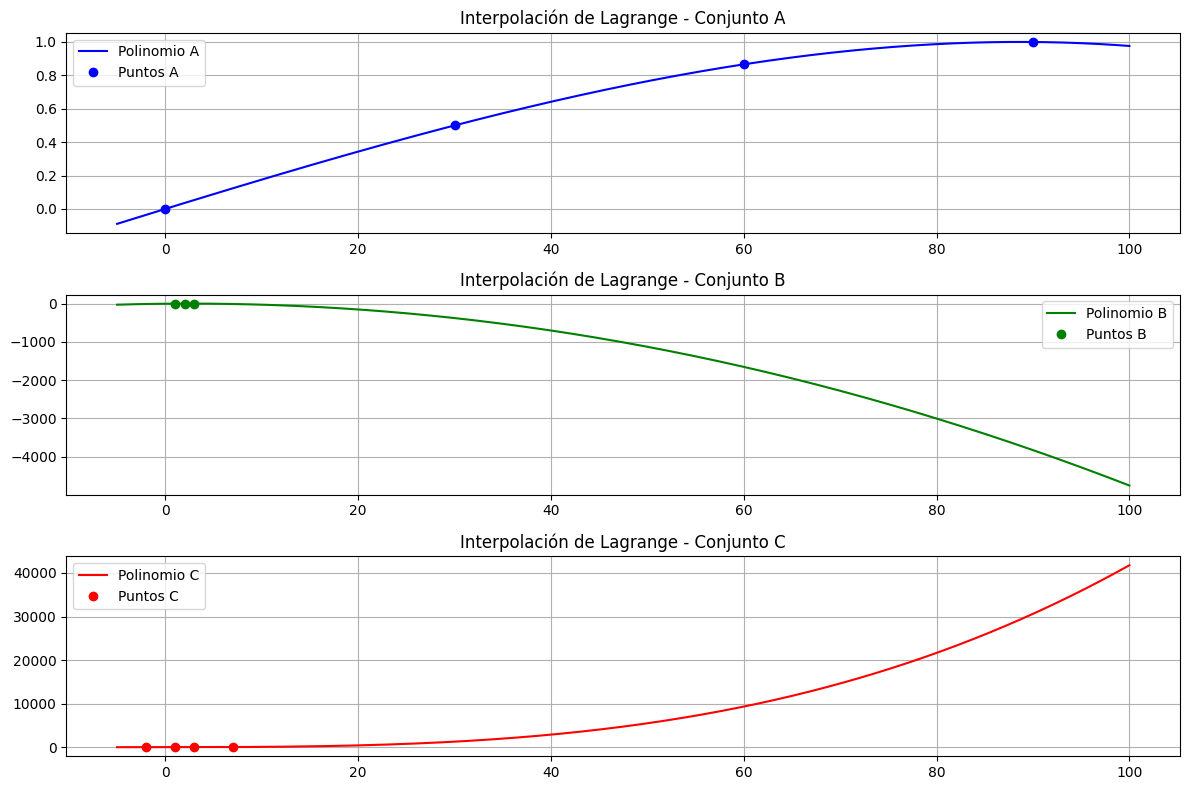

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# === Conjunto A ===
x_a = np.array([0, 30, 60, 90], dtype=float)
y_a = np.array([0.0, 0.5, np.sqrt(3)/2, 1.0])   

poly_a = lagrange(x_a, y_a)

# === Conjunto B ===
x_b = np.array([1, 2, 3], dtype=float)
y_b = np.array([1.0, 2.0, 2.0])
poly_b = lagrange(x_b, y_b)

# === Conjunto C ===
x_c = np.array([-2, 1, 3, 7], dtype=float)
y_c = np.array([5.0, 7.0, 11.0, 34.0])
poly_c = lagrange(x_c, y_c)

# === Mostrar polinomios ===
print("Polinomio de Lagrange - Conjunto A:")
print(np.poly1d(poly_a), "\n")

print("Polinomio de Lagrange - Conjunto B:")
print(np.poly1d(poly_b), "\n")

print("Polinomio de Lagrange - Conjunto C:")
print(np.poly1d(poly_c), "\n")

# === Graficar ===
x_vals = np.linspace(-5, 100, 500)

plt.figure(figsize=(12, 8))

# Gráfica A
plt.subplot(3, 1, 1)
plt.plot(x_vals, poly_a(x_vals), label='Polinomio A', color='blue')
plt.plot(x_a, y_a, 'bo', label='Puntos A')
plt.title('Interpolación de Lagrange - Conjunto A')
plt.legend()
plt.grid(True)

# Gráfica B
plt.subplot(3, 1, 2)
plt.plot(x_vals, poly_b(x_vals), label='Polinomio B', color='green')
plt.plot(x_b, y_b, 'go', label='Puntos B')
plt.title('Interpolación de Lagrange - Conjunto B')
plt.legend()
plt.grid(True)

# Gráfica C
plt.subplot(3, 1, 3)
plt.plot(x_vals, poly_c(x_vals), label='Polinomio C', color='red')
plt.plot(x_c, y_c, 'ro', label='Puntos C')
plt.title('Interpolación de Lagrange - Conjunto C')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
